# IE6400 Foundations Data Analytics Engineering
# Fall Semester 2023

# Project 2:
# Topic: Customer Segmentation using RFM Analysis

### Data Preprocessing:                                                                                                                                                       
#### Import the dataset and perform necessary data preprocessing steps, including data
#### cleaning, handling missing values, and converting data types if needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
proj2 = pd.read_csv('proj2_data.csv', encoding='ISO-8859-1')

In [3]:
proj2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
proj2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
proj2.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
proj2.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
proj2.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
proj2 = proj2.dropna(subset=['CustomerID', 'Description'])

In [9]:
proj2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
proj2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
proj2C = proj2.copy()
proj2C.drop_duplicates(inplace=True)

In [12]:
proj2C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
#proj2C['InvoiceNo'] = proj2C['InvoiceNo'].astype(int) 
proj2C['Quantity'] = proj2C['Quantity'].astype(int)
proj2C['InvoiceDate'] = pd.to_datetime(proj2C['InvoiceDate'])  
proj2C['Description'] = proj2C['Description'].astype(str)
proj2C['StockCode'] = proj2C['StockCode'].astype(str)
proj2C['UnitPrice'] = proj2C['UnitPrice'].astype(float)
proj2C['CustomerID'] = proj2C['CustomerID'].astype(int)
proj2C['Country'] = proj2C['Country'].astype('category')

In [14]:
proj2C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


# Data Overview

### What is the size of the dataset in terms of the number of rows and  columns?
The size of the dataset is 541909 rows × 8 columns


### Can you provide a brief description of each column in the dataset?

InvoiceNo - An exclusive reference number assigned to each transaction or invoice.

StockCode - A code used to identify the specific stock or product linked to the transaction.

Description - A written account detailing the stock or product involved in the transaction.

Quantity - The total count of products or items associated with the particular transaction.

InvoiceDate - The specific date and time when the invoice or transaction was created.

UnitPrice - The cost of a single unit of the respective product or item.

CustomerID - A distinct identifier assigned to the customer connected to the transaction.

Country - The nation where the customer involved in the transaction is situated or where the transaction took place.

### What is the time period covered by this dataset?

The range is between 12/1/2010,8:26 and 12/9/2011,12:50

# RFM Calculation:

### • Calculate the RFM metrics for each customer:

### Recency (R): How recently a customer made a purchase. Calculate the number of days since the customer's            last purchase.

In [15]:
max_date = proj2C['InvoiceDate'].max()
customer_recency = proj2C.groupby('CustomerID')['InvoiceDate'].max().reset_index()
customer_recency['Days_since_Lpurch'] = (max_date - customer_recency['InvoiceDate']).dt.days
customer_recency.sort_values(by='Days_since_Lpurch',ascending=False)

,CustomerID,InvoiceDate,Days_since_Lpurch
1046,13747,2010-12-01 10:37:00,373
3129,16583,2010-12-01 12:03:00,373
4096,17908,2010-12-01 11:45:00,373
1764,14729,2010-12-01 12:43:00,373
359,12791,2010-12-01 11:27:00,373
...,...,...,...
301,12713,2011-12-09 12:16:00,0
698,13263,2011-12-08 13:59:00,0
105,12476,2011-12-08 14:08:00,0
900,13536,2011-12-08 16:38:00,0


### Frequency (F): How often a customer makes a purchase. Calculate the total number of orders for each customer.

In [16]:
customer_frequency = proj2C.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_frequency.rename(columns={'InvoiceNo': 'total_no_of_orders'}, inplace=True)
customer_frequency.sort_values(by='total_no_of_orders',ascending=False)

,CustomerID,total_no_of_orders
1895,14911,248
330,12748,224
4042,17841,169
1674,14606,128
568,13089,118
...,...,...
1141,13877,1
2997,16400,1
1142,13878,1
1149,13886,1


### Monetary (M): The total monetary value of a customer's purchases. Calculate the sum of the total price for each customer.

In [17]:
proj2C['TotalPrice'] = proj2C['Quantity'] * proj2C['UnitPrice']
customer_monetary = proj2C.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_monetary.sort_values(by='TotalPrice',ascending=False)

,CustomerID,TotalPrice
1703,14646,279489.02
4233,18102,256438.49
3758,17450,187322.17
1895,14911,132458.73
55,12415,123725.45
...,...,...
125,12503,-1126.00
3870,17603,-1165.30
1384,14213,-1192.20
2236,15369,-1592.49


In [18]:
rfm_metrics = pd.merge(customer_recency[['CustomerID', 'Days_since_Lpurch']],
                       customer_frequency[['CustomerID', 'total_no_of_orders']],
                       on='CustomerID')

rfm_metrics = pd.merge(rfm_metrics, customer_monetary[['CustomerID', 'TotalPrice']],
                       on='CustomerID')
rfm_metrics.sort_values(by='total_no_of_orders',ascending=False)

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice
1895,14911,0,248,132458.73
330,12748,0,224,28405.56
4042,17841,1,169,39869.05
1674,14606,0,128,11633.35
568,13089,2,118,57322.13
...,...,...,...,...
1141,13877,85,1,117.24
2997,16400,94,1,303.93
1142,13878,54,1,1271.57
1149,13886,70,1,243.56


# Customer Analysis

### How many unique customers are there in the dataset?

There are 4339 unique customers

### What is the distribution of the number of orders per customer?

In [19]:
customer_frequency['total_no_of_orders'].describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: total_no_of_orders, dtype: float64

Here as observed the average number of order a customer places is approximately 4

### Can you identify the top 5 customers who have made the most purchases by order count?

In [20]:
top5=rfm_metrics.sort_values(by='total_no_of_orders', ascending = False)
top5.head()

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice
1895,14911,0,248,132458.73
330,12748,0,224,28405.56
4042,17841,1,169,39869.05
1674,14606,0,128,11633.35
568,13089,2,118,57322.13


The Top 5 customers with most orders are customers with ID:
1) 12748

2) 14911

3) 17841

4) 13089

5) 14606

# RFM Segmentation:

### Assign RFM scores to each customer based on their quartiles (or custom-definedbins). You can use quartiles (1 to 4) or custom scores (e.g., 1 to 5) for each RFMmetric.

In [21]:
# Assign RFM scores based on quartiles (you can customize bins as needed)
rfm_metrics['recency_score']= pd.qcut(rfm_metrics['Days_since_Lpurch'], q=4, labels=False, precision=0,duplicates='drop')
rfm_metrics['frequency_score'] = pd.qcut(rfm_metrics['total_no_of_orders'], q=4, labels=False, precision=0,duplicates='drop')
rfm_metrics['monetary_score']= pd.qcut(rfm_metrics['TotalPrice'], q=4, labels=False, precision=0,duplicates='drop')

# Display the RFM dataframe with scores
print(rfm_metrics.head())

   CustomerID  Days_since_Lpurch  total_no_of_orders  TotalPrice  \
0       12346                325                   2        0.00   
1       12347                  1                   7     4310.00   
2       12348                 74                   4     1797.24   
3       12349                 18                   1     1757.55   
4       12350                309                   1      334.40   

   recency_score  frequency_score  monetary_score  
0              3                0               0  
1              0                2               3  
2              2                1               3  
3              1                0               3  
4              3                0               1  


In [22]:
rfm_metrics.shape

(4372, 7)

In [23]:
rfm_metrics.head()

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score
0,12346,325,2,0.00,3,0,0
1,12347,1,7,4310.00,0,2,3
2,12348,74,4,1797.24,2,1,3
3,12349,18,1,1757.55,1,0,3
4,12350,309,1,334.40,3,0,1


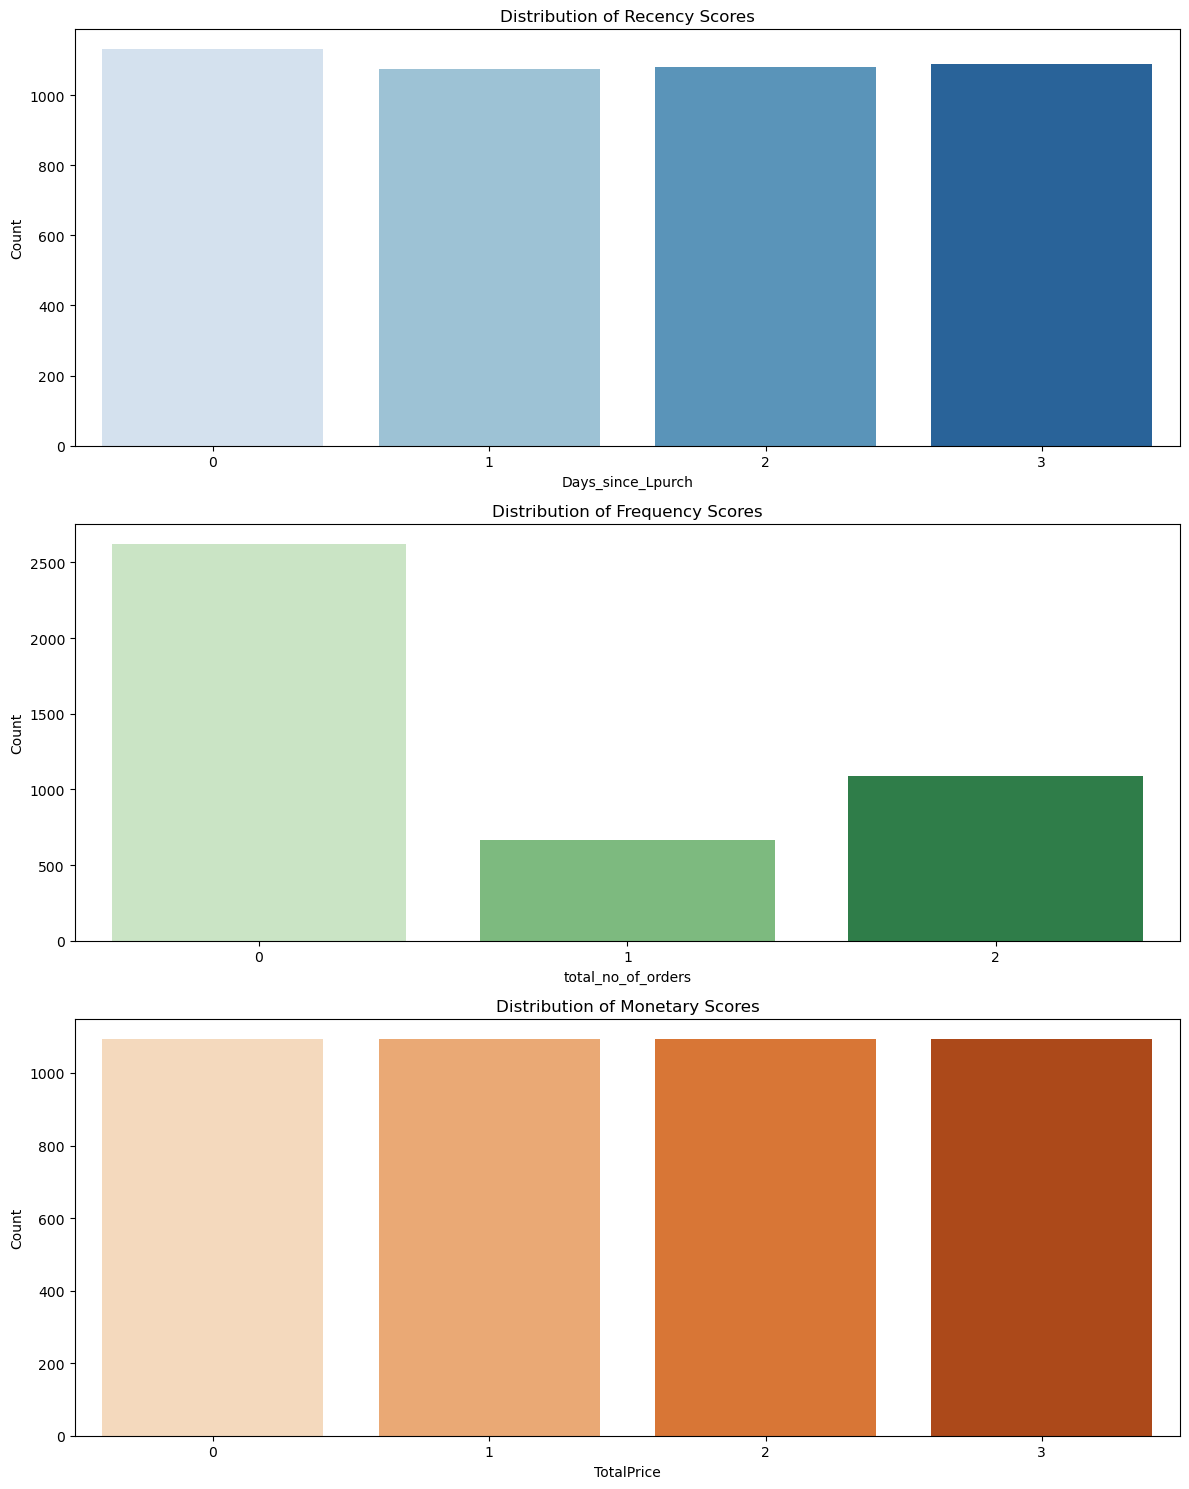

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

#Visualize Recency_Score distribution
sns.countplot(x='recency_score', data=rfm_metrics, palette='Blues', ax=axes[0])
axes[0].set_title('Distribution of Recency Scores')
axes[0].set_xlabel('Days_since_Lpurch')
axes[0].set_ylabel('Count')

# Visualize Frequency_Score distribution
sns.countplot(x='frequency_score', data=rfm_metrics, palette='Greens', ax=axes[1])
axes[1].set_title('Distribution of Frequency Scores')
axes[1].set_xlabel('total_no_of_orders')
axes[1].set_ylabel('Count')

# Visualize Monetary_Score distribution
sns.countplot(x='monetary_score', data=rfm_metrics, palette='Oranges', ax=axes[2])
axes[2].set_title('Distribution of Monetary Scores')
axes[2].set_xlabel('TotalPrice')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Combine the RFM scores to create a single RFM score for each customer.

In [25]:
rfm_metrics['rfm_score'] = rfm_metrics['recency_score'].astype(str) + rfm_metrics['frequency_score'].astype(str) + rfm_metrics['monetary_score'].astype(str)

In [26]:
rfm_metrics.head()

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score,rfm_score
0,12346,325,2,0.00,3,0,0,300
1,12347,1,7,4310.00,0,2,3,023
2,12348,74,4,1797.24,2,1,3,213
3,12349,18,1,1757.55,1,0,3,103
4,12350,309,1,334.40,3,0,1,301


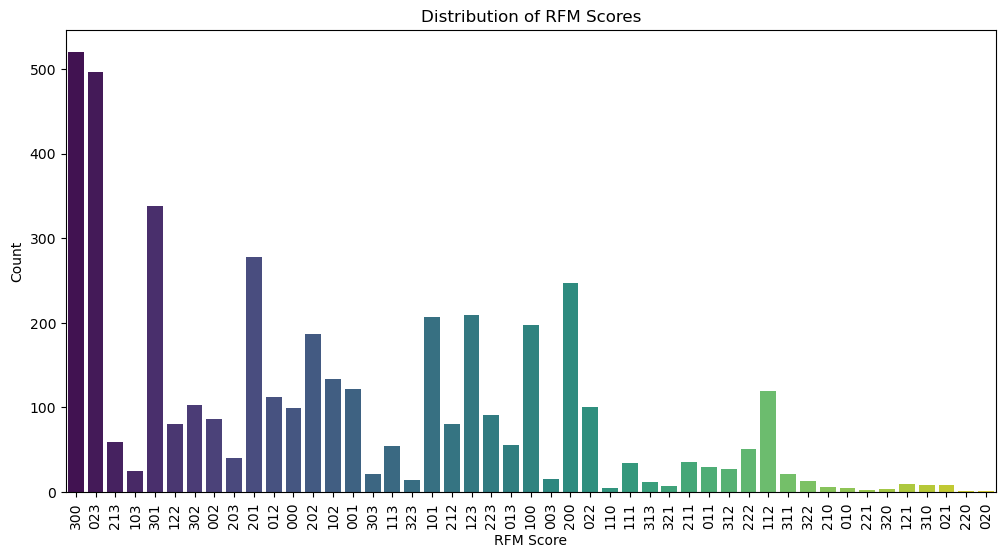

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rfm_score', data=rfm_metrics, palette='viridis')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

# Customer Segmentation:

### Use clustering techniques (e.g., K-Means clustering) to segment customers based on their RFM scores.                                                                                                                                                                                                            Experiment with different numbers of clusters to find the optimal number that provides meaningful segments.

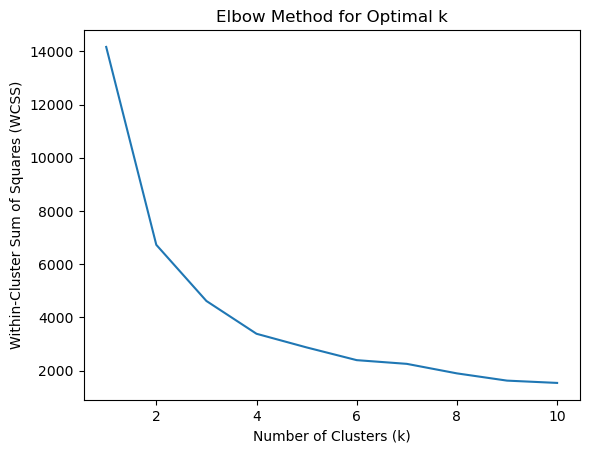

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have rfm_metrics DataFrame with 'RFM_Score' column

# Extract RFM scores as features for clustering
X = rfm_metrics[['recency_score', 'frequency_score', 'monetary_score']]

# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
# Let's say the optimal number is 3 (you should visually inspect the graph)
optimal_k = 3

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
rfm_metrics['Cluster'] = kmeans.fit_predict(X)

In [29]:
rfm_metrics.sort_values(by='Cluster',ascending=False)

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score,rfm_score,Cluster
610,13142,18,1,307.09,1,0,1,101,2
1468,14332,22,3,840.21,1,0,2,102,2
3356,16887,34,1,192.33,1,0,0,100,2
739,13318,0,3,640.76,0,0,1,001,2
3355,16885,14,3,450.41,0,0,1,001,2
...,...,...,...,...,...,...,...,...,...
2823,16163,224,3,441.60,3,0,1,301,0
2822,16162,251,1,37.40,3,0,0,300,0
1118,13848,91,3,1255.00,2,0,2,202,0
2819,16159,281,1,348.20,3,0,1,301,0


# Segment Profiling:

### Analyze and profile each customer segment. Describe the characteristics of customers in each segment, including their RFM scores and any other relevant attributes.

In [30]:
segment_data = pd.merge(rfm_metrics, proj2C[['CustomerID', 'Country','Description','UnitPrice']], on='CustomerID')
segment_data.sort_values(by='Description',ascending=False)

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score,rfm_score,Cluster,Country,Description,UnitPrice
219558,15472,112,1,371.56,2,0,1,201,0,United Kingdom,ZINC WIRE SWEETHEART LETTER TRAY,3.75
332043,17290,3,2,513.01,0,0,1,001,2,United Kingdom,ZINC WIRE SWEETHEART LETTER TRAY,3.75
218330,15444,8,2,1411.21,0,0,2,002,2,United Kingdom,ZINC WIRE SWEETHEART LETTER TRAY,3.75
46935,13012,8,11,1296.62,0,2,2,022,1,United Kingdom,ZINC WIRE SWEETHEART LETTER TRAY,3.75
166024,14710,13,4,599.48,0,1,1,011,2,United Kingdom,ZINC WIRE SWEETHEART LETTER TRAY,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...
392141,18116,67,8,1403.11,2,2,2,222,1,United Kingdom,4 PURPLE FLOCK DINNER CANDLES,2.55
366288,17774,96,5,1203.78,2,1,2,212,1,United Kingdom,4 PURPLE FLOCK DINNER CANDLES,2.55
44210,12953,9,1,329.85,0,0,1,001,2,United Kingdom,4 PURPLE FLOCK DINNER CANDLES,2.55
388208,18055,6,11,6729.29,0,2,3,023,1,United Kingdom,4 PURPLE FLOCK DINNER CANDLES,2.55


In [31]:
segment_data.isnull().sum()

CustomerID            0
Days_since_Lpurch     0
total_no_of_orders    0
TotalPrice            0
recency_score         0
frequency_score       0
monetary_score        0
rfm_score             0
Cluster               0
Country               0
Description           0
UnitPrice             0
dtype: int64

In [32]:
segment_0_data = segment_data[segment_data['Cluster'] == 0]
segment_1_data = segment_data[segment_data['Cluster'] == 1]
segment_2_data = segment_data[segment_data['Cluster'] == 2]

In [33]:
segment_0_data

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score,rfm_score,Cluster,Country,Description,UnitPrice
0,12346,325,2,0.00,3,0,0,300,0,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,1.04
1,12346,325,2,0.00,3,0,0,300,0,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,1.04
288,12350,309,1,334.40,3,0,1,301,0,Norway,CHOCOLATE THIS WAY METAL SIGN,2.10
289,12350,309,1,334.40,3,0,1,301,0,Norway,METAL SIGN NEIGHBOURHOOD WITCH,2.10
290,12350,309,1,334.40,3,0,1,301,0,Norway,RETRO MOD TRAY,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...
400795,18281,180,1,80.82,3,0,0,300,0,United Kingdom,PENNY FARTHING BIRTHDAY CARD,0.42
400796,18281,180,1,80.82,3,0,0,300,0,United Kingdom,SPACEBOY BABY GIFT SET,16.95
400797,18281,180,1,80.82,3,0,0,300,0,United Kingdom,DOLLY GIRL BABY GIFT SET,16.95
400798,18281,180,1,80.82,3,0,0,300,0,United Kingdom,LUNCH BAG DOILEY PATTERN,1.65


In [34]:
segment_1_data

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score,rfm_score,Cluster,Country,Description,UnitPrice
2,12347,1,7,4310.00,0,2,3,023,1,Iceland,BLACK CANDELABRA T-LIGHT HOLDER,2.10
3,12347,1,7,4310.00,0,2,3,023,1,Iceland,AIRLINE BAG VINTAGE JET SET BROWN,4.25
4,12347,1,7,4310.00,0,2,3,023,1,Iceland,COLOUR GLASS. STAR T-LIGHT HOLDER,3.25
5,12347,1,7,4310.00,0,2,3,023,1,Iceland,MINI PAINT SET VINTAGE,0.65
6,12347,1,7,4310.00,0,2,3,023,1,Iceland,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,18287,42,3,1837.28,1,0,3,103,1,United Kingdom,LIPSTICK PEN RED,0.42
401600,18287,42,3,1837.28,1,0,3,103,1,United Kingdom,HAND WARMER SCOTTY DOG DESIGN,2.10
401601,18287,42,3,1837.28,1,0,3,103,1,United Kingdom,SET OF 3 WOODEN SLEIGH DECORATIONS,1.25
401602,18287,42,3,1837.28,1,0,3,103,1,United Kingdom,PAINTED METAL STAR WITH HOLLY BELLS,0.39


In [35]:
segment_2_data

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score,rfm_score,Cluster,Country,Description,UnitPrice
665,12358,1,2,1168.06,0,0,2,002,2,Austria,FAIRY CAKE DESIGN UMBRELLA,3.75
666,12358,1,2,1168.06,0,0,2,002,2,Austria,CERAMIC STRAWBERRY DESIGN MUG,1.49
667,12358,1,2,1168.06,0,0,2,002,2,Austria,CERAMIC CAKE STAND + HANGING CAKES,9.95
668,12358,1,2,1168.06,0,0,2,002,2,Austria,CERAMIC CAKE DESIGN SPOTTED PLATE,1.49
669,12358,1,2,1168.06,0,0,2,002,2,Austria,DOORMAT FAIRY CAKE,7.95
...,...,...,...,...,...,...,...,...,...,...,...,...
400808,18282,7,3,176.60,0,0,0,000,2,United Kingdom,REGENCY CAKESTAND 3 TIER,12.75
400809,18282,7,3,176.60,0,0,0,000,2,United Kingdom,ROSES REGENCY TEACUP AND SAUCER,2.95
400810,18282,7,3,176.60,0,0,0,000,2,United Kingdom,CARD CHRISTMAS VILLAGE,0.42
400811,18282,7,3,176.60,0,0,0,000,2,United Kingdom,REGENCY SUGAR BOWL GREEN,4.15


In [36]:
segment_0_atributes = segment_0_data[['recency_score', 'frequency_score', 'monetary_score','UnitPrice', 'Description', 'Country']]
segment_0_atributes

,recency_score,frequency_score,monetary_score,UnitPrice,Description,Country
0,3,0,0,1.04,MEDIUM CERAMIC TOP STORAGE JAR,United Kingdom
1,3,0,0,1.04,MEDIUM CERAMIC TOP STORAGE JAR,United Kingdom
288,3,0,1,2.10,CHOCOLATE THIS WAY METAL SIGN,Norway
289,3,0,1,2.10,METAL SIGN NEIGHBOURHOOD WITCH,Norway
290,3,0,1,0.85,RETRO MOD TRAY,Norway
...,...,...,...,...,...,...
400795,3,0,0,0.42,PENNY FARTHING BIRTHDAY CARD,United Kingdom
400796,3,0,0,16.95,SPACEBOY BABY GIFT SET,United Kingdom
400797,3,0,0,16.95,DOLLY GIRL BABY GIFT SET,United Kingdom
400798,3,0,0,1.65,LUNCH BAG DOILEY PATTERN,United Kingdom


In [37]:
segment_1_atributes = segment_1_data[['recency_score', 'frequency_score', 'monetary_score','UnitPrice', 'Description', 'Country']]
segment_1_atributes

,recency_score,frequency_score,monetary_score,UnitPrice,Description,Country
2,0,2,3,2.10,BLACK CANDELABRA T-LIGHT HOLDER,Iceland
3,0,2,3,4.25,AIRLINE BAG VINTAGE JET SET BROWN,Iceland
4,0,2,3,3.25,COLOUR GLASS. STAR T-LIGHT HOLDER,Iceland
5,0,2,3,0.65,MINI PAINT SET VINTAGE,Iceland
6,0,2,3,1.25,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,Iceland
...,...,...,...,...,...,...
401599,1,0,3,0.42,LIPSTICK PEN RED,United Kingdom
401600,1,0,3,2.10,HAND WARMER SCOTTY DOG DESIGN,United Kingdom
401601,1,0,3,1.25,SET OF 3 WOODEN SLEIGH DECORATIONS,United Kingdom
401602,1,0,3,0.39,PAINTED METAL STAR WITH HOLLY BELLS,United Kingdom


In [38]:
segment_2_atributes= segment_2_data[['recency_score', 'frequency_score', 'monetary_score','UnitPrice', 'Description', 'Country']]
segment_2_atributes

,recency_score,frequency_score,monetary_score,UnitPrice,Description,Country
665,0,0,2,3.75,FAIRY CAKE DESIGN UMBRELLA,Austria
666,0,0,2,1.49,CERAMIC STRAWBERRY DESIGN MUG,Austria
667,0,0,2,9.95,CERAMIC CAKE STAND + HANGING CAKES,Austria
668,0,0,2,1.49,CERAMIC CAKE DESIGN SPOTTED PLATE,Austria
669,0,0,2,7.95,DOORMAT FAIRY CAKE,Austria
...,...,...,...,...,...,...
400808,0,0,0,12.75,REGENCY CAKESTAND 3 TIER,United Kingdom
400809,0,0,0,2.95,ROSES REGENCY TEACUP AND SAUCER,United Kingdom
400810,0,0,0,0.42,CARD CHRISTMAS VILLAGE,United Kingdom
400811,0,0,0,4.15,REGENCY SUGAR BOWL GREEN,United Kingdom


In [39]:
print("Segment 0 attributes")
segment_0_atributes.describe(include='all')

Segment 0 attributes


,recency_score,frequency_score,monetary_score,UnitPrice,Description,Country
count,51958.000000,51958.000000,51958.000000,51958.000000,51958,51958
unique,NaN,NaN,NaN,NaN,3332,31
top,NaN,NaN,NaN,NaN,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,NaN,NaN,NaN,NaN,352,46861
mean,2.541765,0.165711,1.158243,4.312703,NaN,NaN
std,0.498257,0.461444,0.804037,172.675528,NaN,NaN
min,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.000000,0.000000,1.000000,1.250000,NaN,NaN
50%,3.000000,0.000000,1.000000,1.950000,NaN,NaN
75%,3.000000,0.000000,2.000000,3.750000,NaN,NaN


In [40]:
print("\nSegment 1 attributes")
segment_1_atributes.describe(include='all')


Segment 1 attributes


,recency_score,frequency_score,monetary_score,UnitPrice,Description,Country
count,309698.000000,309698.000000,309698.000000,309698.000000,309698,309698
unique,NaN,NaN,NaN,NaN,3787,27
top,NaN,NaN,NaN,NaN,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,NaN,NaN,NaN,NaN,1578,272504
mean,0.478531,1.801549,2.835088,3.416502,NaN,NaN
std,0.724562,0.452003,0.380035,36.092727,NaN,NaN
min,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,3.000000,1.250000,NaN,NaN
50%,0.000000,2.000000,3.000000,1.950000,NaN,NaN
75%,1.000000,2.000000,3.000000,3.750000,NaN,NaN


In [41]:
print("\nSegment 2 attributes")
segment_2_atributes.describe(include='all')


Segment 2 attributes


,recency_score,frequency_score,monetary_score,UnitPrice,Description,Country
count,39948.000000,39948.000000,39948.000000,39948.000000,39948,39948
unique,NaN,NaN,NaN,NaN,3054,18
top,NaN,NaN,NaN,NaN,REX CASH+CARRY JUMBO SHOPPER,United Kingdom
freq,NaN,NaN,NaN,NaN,186,37363
mean,0.607790,0.103785,1.251202,2.829542,NaN,NaN
std,0.488249,0.308170,0.705772,6.941557,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,1.000000,0.850000,NaN,NaN
50%,1.000000,0.000000,1.000000,1.650000,NaN,NaN
75%,1.000000,0.000000,2.000000,3.390000,NaN,NaN


# Visualization:
### Create visualizations (e.g., bar charts, scatter plots, or heat maps) to illustrate the RFM distribution and the clusters formed.

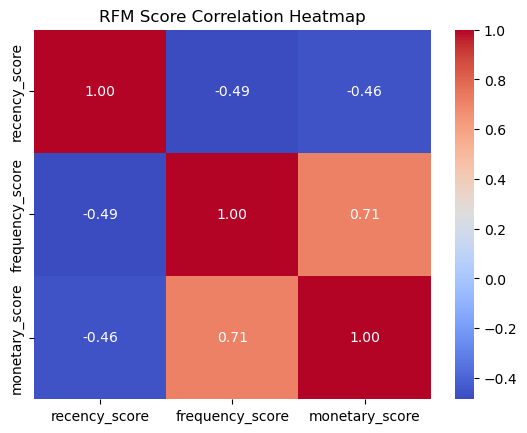

In [42]:
# RFM Distribution Heatmap
rfm_heatmap = rfm_metrics[['recency_score', 'frequency_score', 'monetary_score']]
sns.heatmap(rfm_heatmap.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('RFM Score Correlation Heatmap')
plt.show()

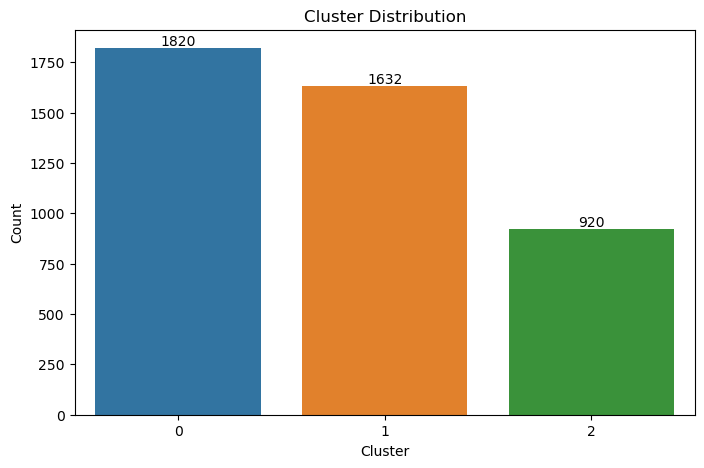

In [43]:
plt.figure(figsize=(8, 5))
cluster_counts = rfm_metrics['Cluster'].value_counts()
sns.countplot(x='Cluster', data=rfm_metrics)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Adding annotations for each bar
for i, count in enumerate(cluster_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

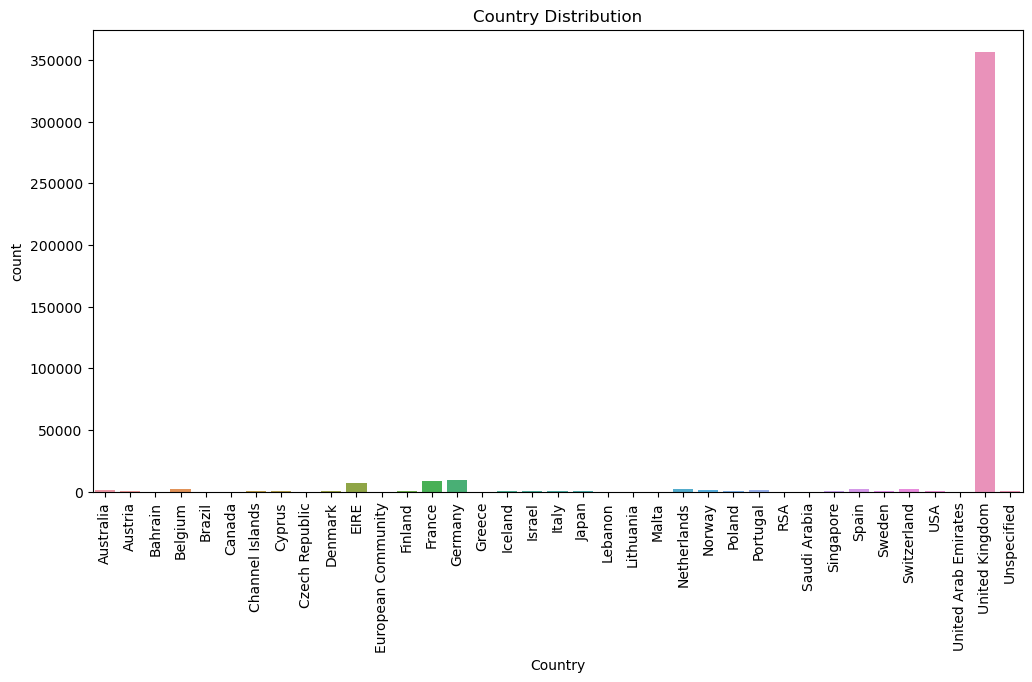

In [44]:
# Bar chart for Country
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=proj2C)
plt.title('Country Distribution')
plt.xticks(rotation=90)
plt.show()

# Product Analysis

### What are the top 10 most frequently purchased products?

In [45]:
# Bar chart for Description (top 10)
top10_desc = proj2C['Description'].value_counts().nlargest(10)
top10_desc

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64

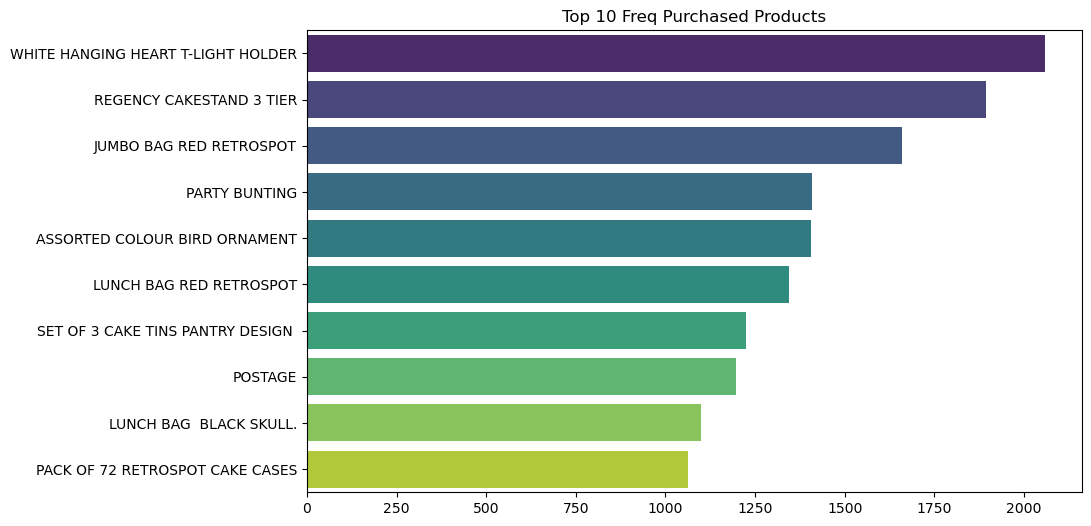

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_desc.values, y=top10_desc.index, palette='viridis')
plt.title('Top 10 Freq Purchased Products')
plt.show()

### What is the average price of products in the dataset?

In [47]:
avgprc = round(proj2C['UnitPrice'].mean(), 2)
print('The average price is:')
avgprc

The average price is:


3.47

### Can you find out which product category generates the highest revenue?

In [48]:
rev_by_cat = proj2C.groupby('Description')['TotalPrice'].sum()
rev_by_cat.sort_values(ascending=False).head(10)

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64

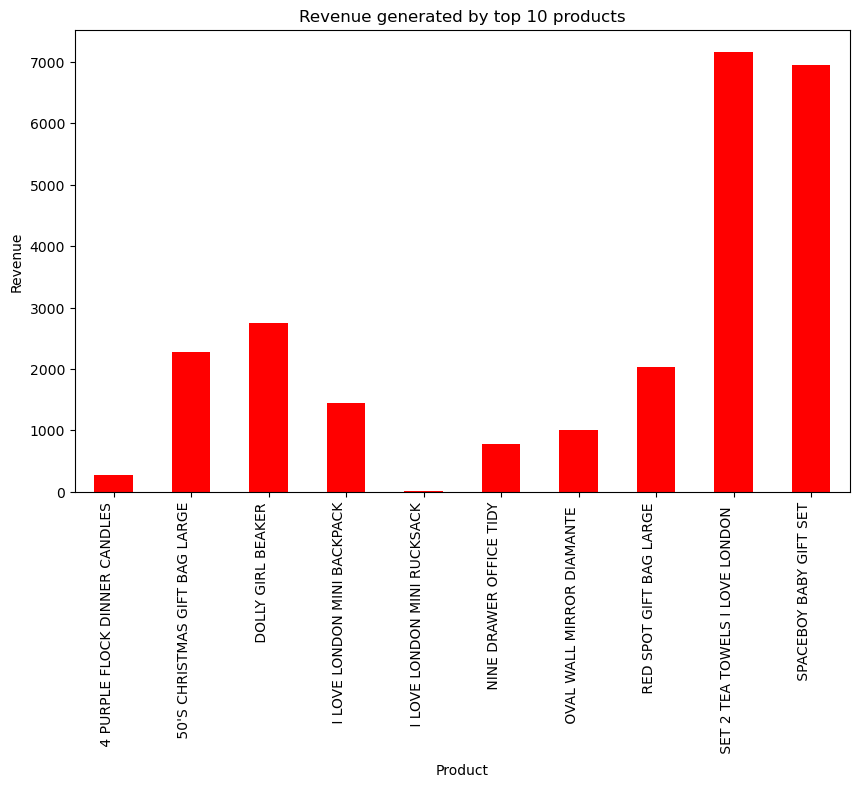

In [49]:
plt.figure(figsize=(10, 6))
rev_by_cat.head(10).plot(kind='bar', color='red')
plt.title('Revenue generated by top 10 products')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=90, ha='right')
plt.show()

# Time Analysis

### Is there a specific day of the week or time of day when most orders are placed?

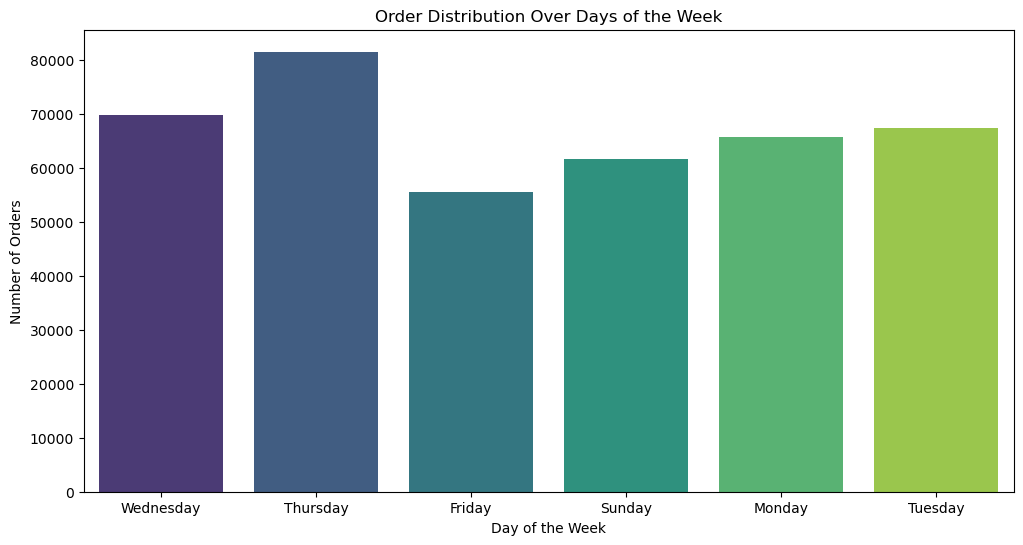

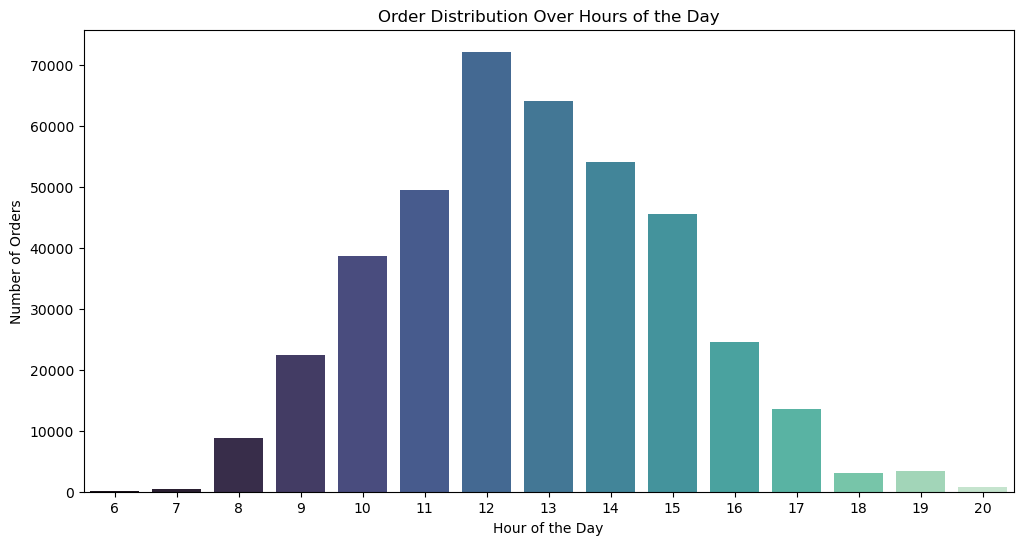

In [50]:
# Extract day of the week and hour from the InvoiceDate
proj2C['DayOfWeek'] = proj2C['InvoiceDate'].dt.day_name()
proj2C['HourOfDay'] = proj2C['InvoiceDate'].dt.hour

# Plot the order distribution over days of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=proj2C, palette='viridis')
plt.title('Order Distribution Over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

# Plot the order distribution over hours of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=proj2C, palette='mako')
plt.title('Order Distribution Over Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

From the above graphs we observe that the most orders are placed on Thursday                                                     
and also that 12PM is the best time when most orders are placed 

### What is the average order processing time?

In [51]:
proj2C.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8


In [52]:
#adding up this new column for further analysis
random_days = np.random.randint(1, 11, size=len(proj2C))

# Add the random number of days to the existing dates
proj2C['Order_FulfillDate'] = pd.to_datetime(proj2C['InvoiceDate']) + pd.to_timedelta(random_days, unit='D')
proj2C.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay,Order_FulfillDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8,2010-12-05 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-08 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8,2010-12-10 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-06 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-10 08:26:00


In [53]:
proj2C['ProcessingTime'] = proj2C['Order_FulfillDate'] - proj2C['InvoiceDate']
proj2C.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay,Order_FulfillDate,ProcessingTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8,2010-12-05 08:26:00,4 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-08 08:26:00,7 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8,2010-12-10 08:26:00,9 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-06 08:26:00,5 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-10 08:26:00,9 days


In [54]:
average_processing_time = proj2C['ProcessingTime'].mean()
print("Average Processing Time:", average_processing_time)

Average Processing Time: 5 days 11:53:22.641407954


### Are there any seasonal trends in the dataset?

In [55]:
proj2C['InvoiceMonth'] = proj2C['InvoiceDate'].dt.to_period('M')
monthly_orders = proj2C.groupby('InvoiceMonth')['InvoiceNo'].nunique()
monthly_orders

InvoiceMonth
2010-12    1708
2011-01    1236
2011-02    1202
2011-03    1619
2011-04    1384
2011-05    1849
2011-06    1707
2011-07    1593
2011-08    1544
2011-09    2078
2011-10    2263
2011-11    3086
2011-12     921
Freq: M, Name: InvoiceNo, dtype: int64

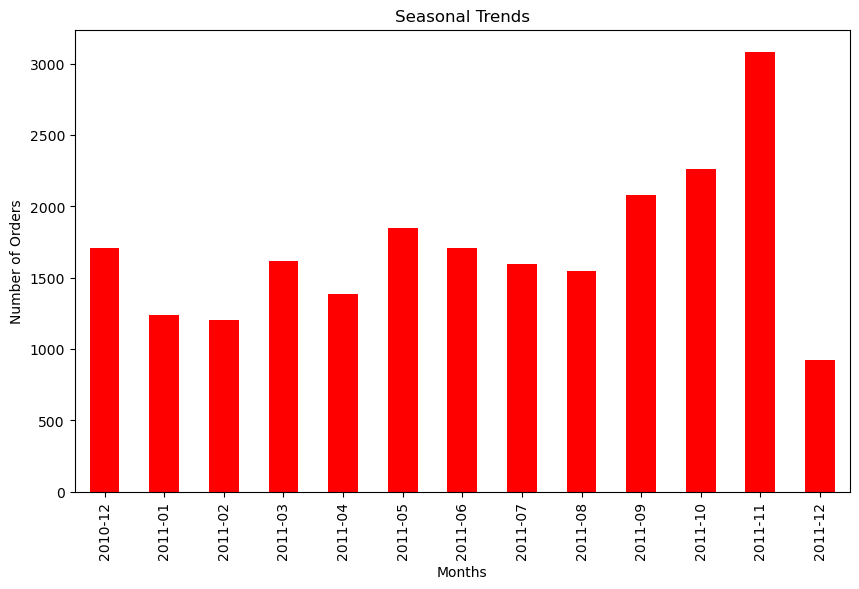

In [56]:
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='bar', color='red')
plt.title('Seasonal Trends')
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.show()

# Geographical Analysis

### Can you determine the top 5 countries with the highest number of orders?

In [57]:
top5C = proj2C['Country'].value_counts().nlargest(5)
top5C

United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: Country, dtype: int64

### Is there a correlation between the country of the customer and the average order value?

In [58]:
# Assuming 'Country' and 'TotalPrice' are the columns representing the country and total price in your DataFrame
average_order_by_country = proj2C.groupby('Country')['TotalPrice'].mean()

# Create a DataFrame with the average order value by country
average_order_df = pd.DataFrame({'Country': average_order_by_country.index, 'AverageOrderValue': average_order_by_country.values})
average_order_df

,Country,AverageOrderValue
0,Australia,108.910787
1,Austria,25.322494
2,Bahrain,32.258824
3,Belgium,19.773301
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,26.520991
7,Cyprus,21.045434
8,Czech Republic,23.590667
9,Denmark,48.247147


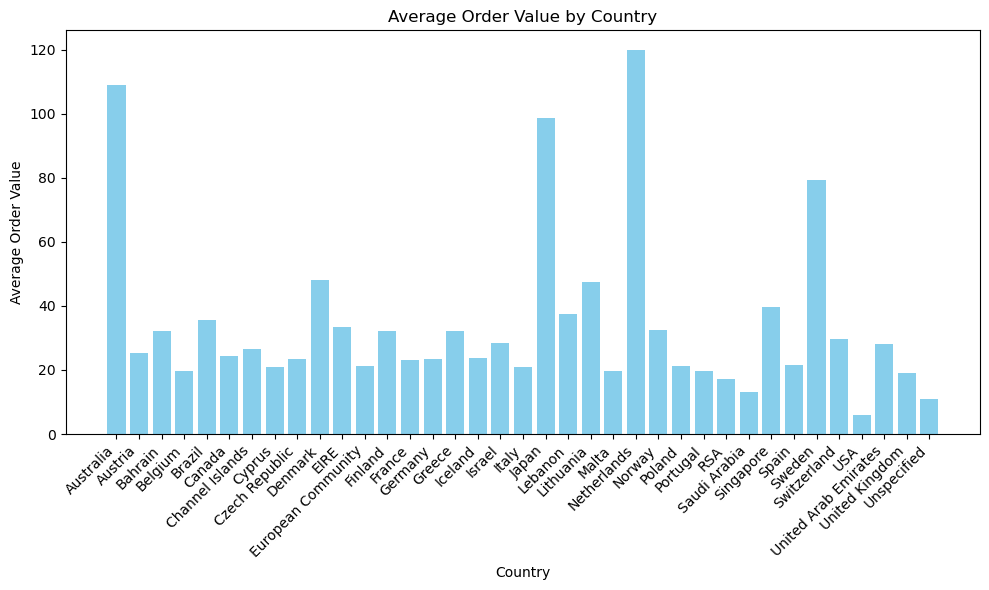

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(average_order_df['Country'], average_order_df['AverageOrderValue'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

No there is no significant relation between country and average order value by country.

In [60]:
proj2C.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay,Order_FulfillDate,ProcessingTime,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8,2010-12-05 08:26:00,4 days,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-08 08:26:00,7 days,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-06 08:26:00,5 days,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12


# Payment Analysis

In [61]:
proj2C.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay,Order_FulfillDate,ProcessingTime,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8,2010-12-05 08:26:00,4 days,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-08 08:26:00,7 days,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-06 08:26:00,5 days,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12


In [62]:
# Create a new column 'PaymentMethod' based on the presence of 'C' in 'InvoiceNo'
proj2C['PaymentMethod'] = proj2C['InvoiceNo'].apply(lambda x: 'Cheque' if 'C' in x else 'Bank Transfer')

# Display the result
proj2C.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay,Order_FulfillDate,ProcessingTime,InvoiceMonth,PaymentMethod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8,2010-12-05 08:26:00,4 days,2010-12,Bank Transfer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-08 08:26:00,7 days,2010-12,Bank Transfer
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12,Bank Transfer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-06 08:26:00,5 days,2010-12,Bank Transfer
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12,Bank Transfer


In [63]:
proj2C['PaymentMethod'].value_counts()

Bank Transfer    392732
Cheque             8872
Name: PaymentMethod, dtype: int64

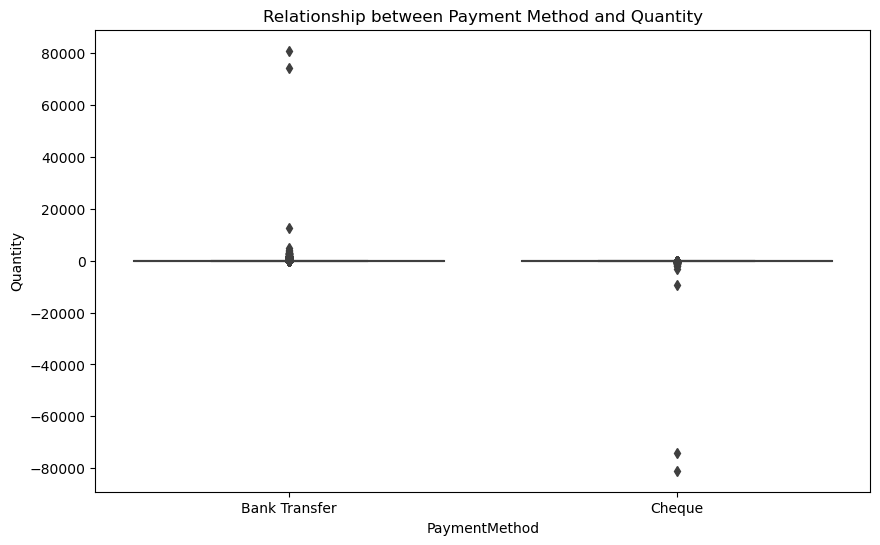

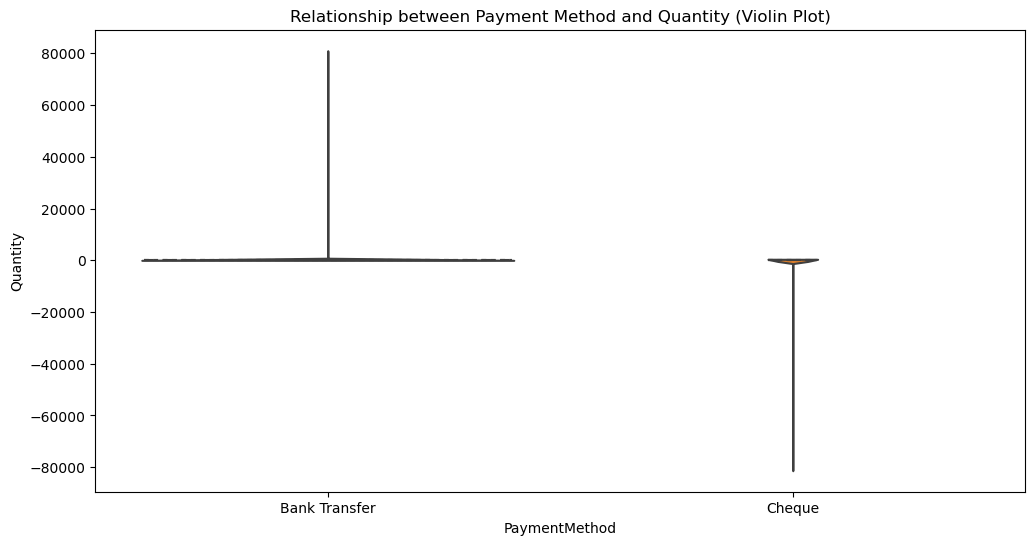

In [64]:
payment_quantity_stats = proj2C.groupby('PaymentMethod')['Quantity'].describe()

# Box plot for visualizing the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='PaymentMethod', y='Quantity', data=proj2C)
plt.title('Relationship between Payment Method and Quantity')
plt.show()

# Violin plot for a more detailed view
plt.figure(figsize=(12, 6))
sns.violinplot(x='PaymentMethod', y='Quantity', data=proj2C, inner='quartile')
plt.title('Relationship between Payment Method and Quantity (Violin Plot)')
plt.show()


# Customer Behaviour

In [65]:
rfm_metrics.head()

,CustomerID,Days_since_Lpurch,total_no_of_orders,TotalPrice,recency_score,frequency_score,monetary_score,rfm_score,Cluster
0,12346,325,2,0.00,3,0,0,300,0
1,12347,1,7,4310.00,0,2,3,023,1
2,12348,74,4,1797.24,2,1,3,213,1
3,12349,18,1,1757.55,1,0,3,103,1
4,12350,309,1,334.40,3,0,1,301,0


In [66]:
rfm_metrics['Days_since_Lpurch'].mean()

91.04711802378775

Hence on an average customers have a difference of approx 92 days before their first and last purchase.

# Returns and Refunds

In [67]:
#The dataset has quantity column which consists of negative values.Where the result gives returned and refunded orders percentage
returns_refunds = proj2C[proj2C['Quantity'] < 0]

# Calculate the percentage of orders with returns or refunds
percentage_returns_refunds = (len(returns_refunds) / len(proj2)) * 100

# Display the result
print(f"The percentage of orders with returns or refunds is: {percentage_returns_refunds:.2f}%")

The percentage of orders with returns or refunds is: 2.18%


In [68]:
# Create a new column 'Return' indicating whether the order had a return or not
proj2C['Return'] = proj2C['Quantity'] < 0

# Group by 'Description' (product category) and calculate the return rate for each category
return_rate_by_category = proj2C.groupby('Description')['Return'].mean()

# Display the return rate for each category
print(return_rate_by_category)

# You can also use statistical tests to assess the significance of the correlation
from scipy.stats import chi2_contingency

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(proj2C['Description'], proj2C['Return'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the chi-square statistic and p-value
print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")

Description
 4 PURPLE FLOCK DINNER CANDLES      0.000000
 50'S CHRISTMAS GIFT BAG LARGE      0.009091
 DOLLY GIRL BEAKER                  0.014599
 I LOVE LONDON MINI BACKPACK        0.000000
 I LOVE LONDON MINI RUCKSACK        0.000000
                                      ...   
ZINC T-LIGHT HOLDER STARS SMALL     0.012448
ZINC TOP  2 DOOR WOODEN SHELF       0.181818
ZINC WILLIE WINKIE  CANDLE STICK    0.005208
ZINC WIRE KITCHEN ORGANISER         0.000000
ZINC WIRE SWEETHEART LETTER TRAY    0.000000
Name: Return, Length: 3896, dtype: float64

Chi-square statistic: 20949.239430416943
P-value: 0.0


# Profitability Analysis 

In [69]:
# Calculate profit for each transaction
proj2C['Profit'] = proj2C['Quantity'] * proj2C['UnitPrice']

# Calculate total profit generated by the company
total_profit = proj2C['Profit'].sum()

# Display the total profit
print(f"The total profit generated by the company is: ${total_profit:.2f}")

The total profit generated by the company is: $8278519.42


In [70]:
# Calculate profit for each transaction
proj2C['Profit'] = proj2C['Quantity'] * proj2C['UnitPrice']

# Calculate revenue for each transaction
proj2C['Revenue'] = abs(proj2C['Quantity']) * proj2C['UnitPrice']

# Calculate profit margin for each transaction
proj2C['ProfitMargin'] = (proj2C['Profit'] / proj2C['Revenue']) * 100

# Group by product and calculate the average profit margin
average_margin_by_product = proj2C.groupby('Description')['ProfitMargin'].mean()

# Get the top 5 products with the highest average profit margins
top_products = average_margin_by_product.nlargest(5)

# Display the top 5 products with the highest profit margins
print("Top 5 products with the highest profit margins:")
print(top_products)

Top 5 products with the highest profit margins:
Description
 4 PURPLE FLOCK DINNER CANDLES    100.0
 I LOVE LONDON MINI BACKPACK      100.0
 I LOVE LONDON MINI RUCKSACK      100.0
 NINE DRAWER OFFICE TIDY          100.0
 RED SPOT GIFT BAG LARGE          100.0
Name: ProfitMargin, dtype: float64


# Customer Satisfaction

In [71]:
import random
feedback_list = ['Good', 'Average', 'will buy again', 'Great Quality', 'expensive for the price','Will recommend to others', 'decent price', 'Bad quality', 'bring new colours', 'stop the production']

# Add a new column with random word values
proj2C['Feedback'] = [random.choice(feedback_list) for _ in range(len(proj2C))]

In [72]:
proj2C.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay,Order_FulfillDate,ProcessingTime,InvoiceMonth,PaymentMethod,Return,Profit,Revenue,ProfitMargin,Feedback
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8,2010-12-05 08:26:00,4 days,2010-12,Bank Transfer,False,15.30,15.30,100.0,bring new colours
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-08 08:26:00,7 days,2010-12,Bank Transfer,False,20.34,20.34,100.0,expensive for the price
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12,Bank Transfer,False,22.00,22.00,100.0,bring new colours
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-06 08:26:00,5 days,2010-12,Bank Transfer,False,20.34,20.34,100.0,Will recommend to others
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8,2010-12-10 08:26:00,9 days,2010-12,Bank Transfer,False,20.34,20.34,100.0,Bad quality


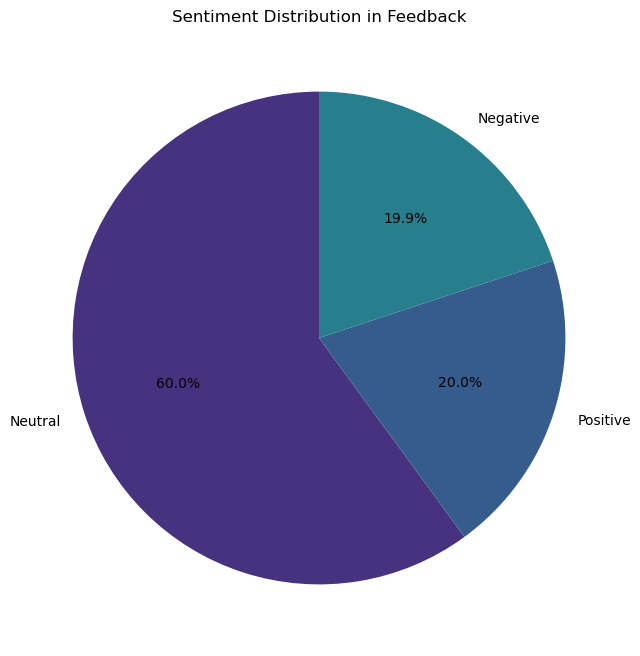

In [73]:
from textblob import TextBlob


proj2C['Sentiment'] = proj2C['Feedback'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Mapping sentiment values to categories
proj2C['Sentiment_Category'] = pd.cut(proj2C['Sentiment'], bins=[-1, -0.5, 0.5, 1], labels=['Negative', 'Neutral', 'Positive'])

sentiment_counts = proj2C['Sentiment_Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Sentiment Distribution in Feedback')
plt.show()


